## READ ME

Name: Kim, Minjun

Student ID: 20195024

Instructions: Please run the cells one by one.

***
***
# **Q4**
### Q4(a)

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [164]:
### Q4(a)
#load Carseats data from ISLP package
Carseats= load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [165]:
#Q4(a)
y=Carseats['Sales']
X=MS(['Price','Urban','US']).fit_transform(Carseats)
model1=sm.OLS(y,X)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        22:51:38   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.0

In [166]:
X[:4] #we can see that ModelSpec() also can deal with the qualitative variables.

,intercept,Price,Urban[Yes],US[Yes]
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0
2,1.0,80,1.0,1.0
3,1.0,97,1.0,1.0


***
### Q4(b)

In [167]:
#Q4(b)
summarize(result1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


Let's interpret above table. The p-values of Price and US are significantly small, which means that the Price and US are highly correlated with Sales. To be more specific, for the higher Price, the lower Sales follows, because of its negative coefficient. Likewise, there would be higher Sales in the US than those of other countries, because of the positive coefficient. On the other hand, the p-value of Urban is very big, which means that we should not reject null hypothesis corresponding to Urban. So we can conclude that Urban is not significantly correlated with Sales.


***
### Q4(c)

In [168]:
#Q4(c)
coef1=summarize(result1)['coef']
print(f"Sales = ({coef1[0]}) + ({coef1[1]}) * Price + ({coef1[2]})* Urban[YES] + ({coef1[3]}) * US[YES].")

Sales = (13.0435) + (-0.0545) * Price + (-0.0219)* Urban[YES] + (1.2006) * US[YES].


***
### Q4(d)
As we discussed in the previous Q4(b), we can reject the null hypothesis of intercept, Price and US. This is because their p-values are significantly small, which indicates that they are highly correlated with Sales, the response.
Whereas, the null hypothesis of Urban cannot be rejected, because of its big p-values.

In [169]:
#Q4(d)
summarize(result1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


***

### Q4(e)
I picked Price and US[Yes] to fit a smaller model since it is found that they are highly correlated with Sales, while Urban[Yes] is not significant.

In [170]:
#Q4(e)
X_new=MS(['Price','US']).fit_transform(Carseats)
model2=sm.OLS(y,X_new)
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        22:51:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0


***
### Q4(f)

Since the R-squared for the models in (a) and (e) are almost identical, we can remove the terms of Urban[Yes] when we fit a multiple regression model.

In [171]:
#Q4(f)
#Computing the R-squared value of two models. Then, we found that they are nearly identical.
print(result1.rsquared)
print(result2.rsquared)

0.23927539218405525
0.23926288842678545


***
### Q4(g)

For linear regression, the 95% confidence interval for the coefficients approximately satisfies $\hat{\beta}_i \pm 2\cdot SE(\hat{\beta}_i)$.
Therefore, the 95% confidence intervals are the same as the below.

In [172]:
#Q4(g)
coef=summarize(result2)['coef']
std_err=summarize(result2)['std err']

for i in range(len(X_new.columns)):
    print(f"95% confidence intervals for {X_new.columns[i]} is [{coef[i]-2*std_err[i]}, {coef[i]+2*std_err[i]}]")


95% confidence intervals for intercept is [11.768799999999999, 14.2928]
95% confidence intervals for Price is [-0.0645, -0.0445]
95% confidence intervals for US[Yes] is [0.6836, 1.7156]


***
### Q4(h)

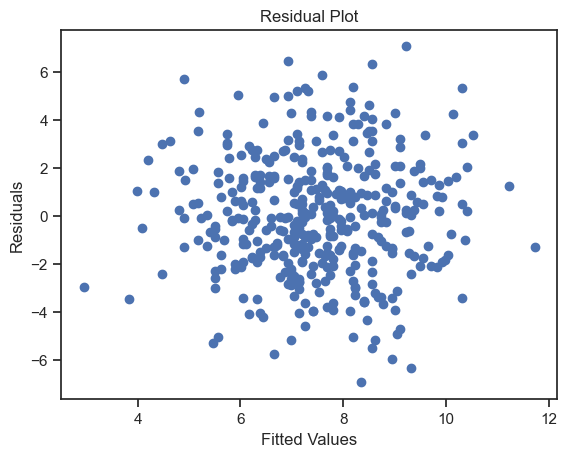

In [174]:
#Q4(h)
import matplotlib.pyplot as plt

plt.scatter(result2.fittedvalues, result2.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

We can use the residual plot to find outliers. Values that deviate significantly from the residual plot can be considered outliers. 
Therefore, if we see the plot above, we cannot find some outstanding outliers in there. But, I think there are some high leverage observations in the model.

***
***
# **Q5**
### Q5(a)

In [195]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [196]:
#Q5(a)
rng=np.random.default_rng(10)
x1=rng.uniform(0,1,size=100)
x2=0.5*x1+rng.normal(size=100)/10
y=2+2*x1+0.3*x2+rng.normal(size=100)

The linear regression model takes the form $y=\beta_{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\epsilon$, where the true regression coefficients are $\beta_{0}=2$, $\beta_{1}=2$, and $\beta_{2}=0.3$.
***
### Q5(b)

In [178]:
#Q5(b)
X_q5=pd.DataFrame({'x1':x1, 'x2':x2})
X_q5.corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


Therefore, correlation between x1 and x2 is 0.772324

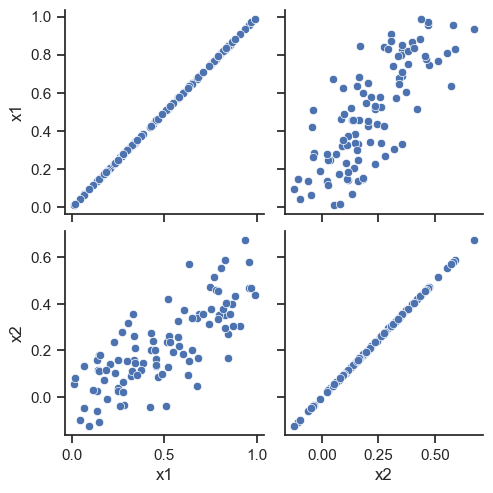

In [179]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

sns.set(font_scale=1.0)
sns.set_style('ticks')
sns.pairplot(X_q5, diag_kind=None)
plt.show()

***
### Q5(c)

In [180]:
#Q5(c)
X_q5=pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1':x1, 'x2':x2 })
y_q5=pd.DataFrame({'y':y})
model_q5=sm.OLS(y_q5,X_q5)
result_q5=model_q5.fit()
print(result_q5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        22:57:59   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

In [181]:
summarize(result_q5)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In this problem, I fitted a least squares regression model to predict y using x1 and x2. 

If you see the table above, you can find that $\hat\beta_{0}=1.9579$, $\hat\beta_{1}=1.6164$, and $\hat\beta_{2}=0.9428$. 

And the true regression coefficients are $\beta_{0}=2$, $\beta_{1}=2$, and $\beta_{2}=0.3$.

We found that $\hat\beta_{2}$ has a big difference with $\beta_{2}$. 

Let's look at the p-values of each variable. Since the p-value of $\hat\beta_{1}$ is significantly small, which means x1 is highly correlated with y. So we can reject the null hypothesis $H_0:\beta_1=0$.

 On the other hand, we cannot reject the null hypothesis $H_0:\beta_2=0$, because the p-value of $\hat\beta_{2}$ is significantly big.

 ***
 ### Q5(d)



In [182]:
X_q5_x1=pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1':x1})
model_q5_x1=sm.OLS(y_q5,X_q5_x1)
result_q5_x1=model_q5_x1.fit()
print(result_q5_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        22:58:00   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

In [183]:
summarize(result_q5_x1)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


We can reject the null hypothesis $H_0:\beta_1=0$ since the p-value corresponding to $\hat\beta_1$ is zero as you can see the table above.
***
### Q5(e)

In [184]:
#Q5(e)
X_q5_x2=pd.DataFrame({'intercept': np.ones(x2.shape[0]), 'x2':x2})
model_q5_x2=sm.OLS(y_q5,X_q5_x2)
result_q5_x2=model_q5_x2.fit()
print(result_q5_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        22:58:02   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

In [185]:
summarize(result_q5_x2)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


This least squares regression model takes the form of $\hat{y}=\hat{\beta _{0}}+\hat{\beta _{1}}x2$.

And, we are able to reject the null hypothesis $H_0:\beta_1=0$ since the p-value corresponding to $\hat\beta_1$ is zero as you can see the table above.

***

### Q5(f)

Yes, the results contradict each other. In the class, we learned that we should not use predictors that are highly correlated with each other. From Q5(b), we found that $x1$ and $x2$ are highly correlated. So, if we fit a least squares regression to predict $y$ using both of $x1$ and $x2$, we consider $x2$ can be represented as $x1$ terms, since they are highly correlated.

In a nutshell, when we fit a least squares regression using only $x2$, it is significant. However, when we fit a least squares regression using both of $x1$ and $x2$, then $x2$ is not significant. 

That's why the "Rejection availability" of null hypothesis of coefficient corresponding to $x2$ in the problem(c) and problem(e) were different.

***
### Q5(g)

In [186]:
#Q5(g)
x1=np.concatenate([x1,[0.1]])
x2=np.concatenate([x2,[0.8]])
y=np.concatenate([y,[6]])

In [187]:
#repeating fitting model from (c)

X_q5=pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1':x1, 'x2':x2 })
y_q5=pd.DataFrame({'y':y})
model_q5=sm.OLS(y_q5,X_q5)
result_q5=model_q5.fit()
print(result_q5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.60e-08
Time:                        22:58:04   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

On the previous problem (c), x1 was signnificantly correlated with y while x2 was not. However in problem(g), this reversed after adding one additional observation. Now, x2 is signnificantly correlated with y. On the other hand, x1 is less correlated with y, since the p-value corresponding to x1 is big. The R-squared slightly increased from 0.291 to 0.292, which means that this model is a little more predictive of data than previous model.

In [188]:
#repeating fitting model from (d)

X_q5_x1=pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1':x1})
model_q5_x1=sm.OLS(y_q5,X_q5_x1)
result_q5_x1=model_q5_x1.fit()
print(result_q5_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           9.23e-07
Time:                        22:58:05   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.0

Compared to the previous problem (d), the R-squared decreased from 0.281 to 0.217, which means that the previous model has a better fit to the data.

In [189]:
#repeating fitting model from (e)

X_q5_x2=pd.DataFrame({'intercept': np.ones(x2.shape[0]), 'x2':x2})
model_q5_x2=sm.OLS(y_q5,X_q5_x2)
result_q5_x2=model_q5_x2.fit()
print(result_q5_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           3.13e-08
Time:                        22:58:06   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.0

Compared to the problem (e), the R-squared increased from 0.222 to 0.267, which means that the latter model better fits the data.

In [190]:
X_q5=pd.DataFrame({'x1':x1, 'x2':x2})
X_q5.corr()

,x1,x2
x1,1.000000,0.678915
x2,0.678915,1.000000


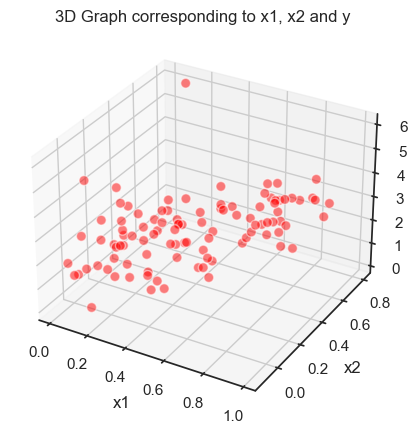

In [194]:
#To find the outliers of the models, I made 3D plots. Then, we can know that there are some outliers, special points away from dense points
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='red', s=50, alpha=0.5, edgecolors='w')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Graph corresponding to x1, x2 and y')

plt.show()


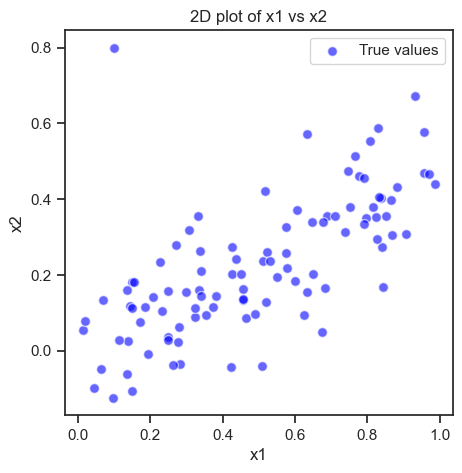

In [193]:
#To find high-leverage of the models, I drew 2D plot of x1 vs x2. Then, we can find some strange points that far away from the dense points.

plt.figure(figsize=(5, 5))
plt.scatter(x1, x2, color='blue', s=50, alpha=0.6, edgecolors='w', label='True values')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D plot of x1 vs x2')
plt.legend()
plt.show()


***
***
# **Q9**
### Q9(a)

In [197]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [198]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [114]:
#Q9(a)
#load data from ISLP
Weekly=load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [115]:
Weekly.describe() #describe() produces a numerical summary of each column in Weekly.


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [116]:
Weekly.corr() #this shows the correlation between predictors.

/var/folders/dk/r36f98650qqc2v_pgp1n5qs80000gn/T/ipykernel_12020/3654272510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Weekly.corr() #this shows the correlation between predictors.


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


As we can see the table above, Year and Volume are highly correlated. Now, let's produce some graphical summaries of the Data.

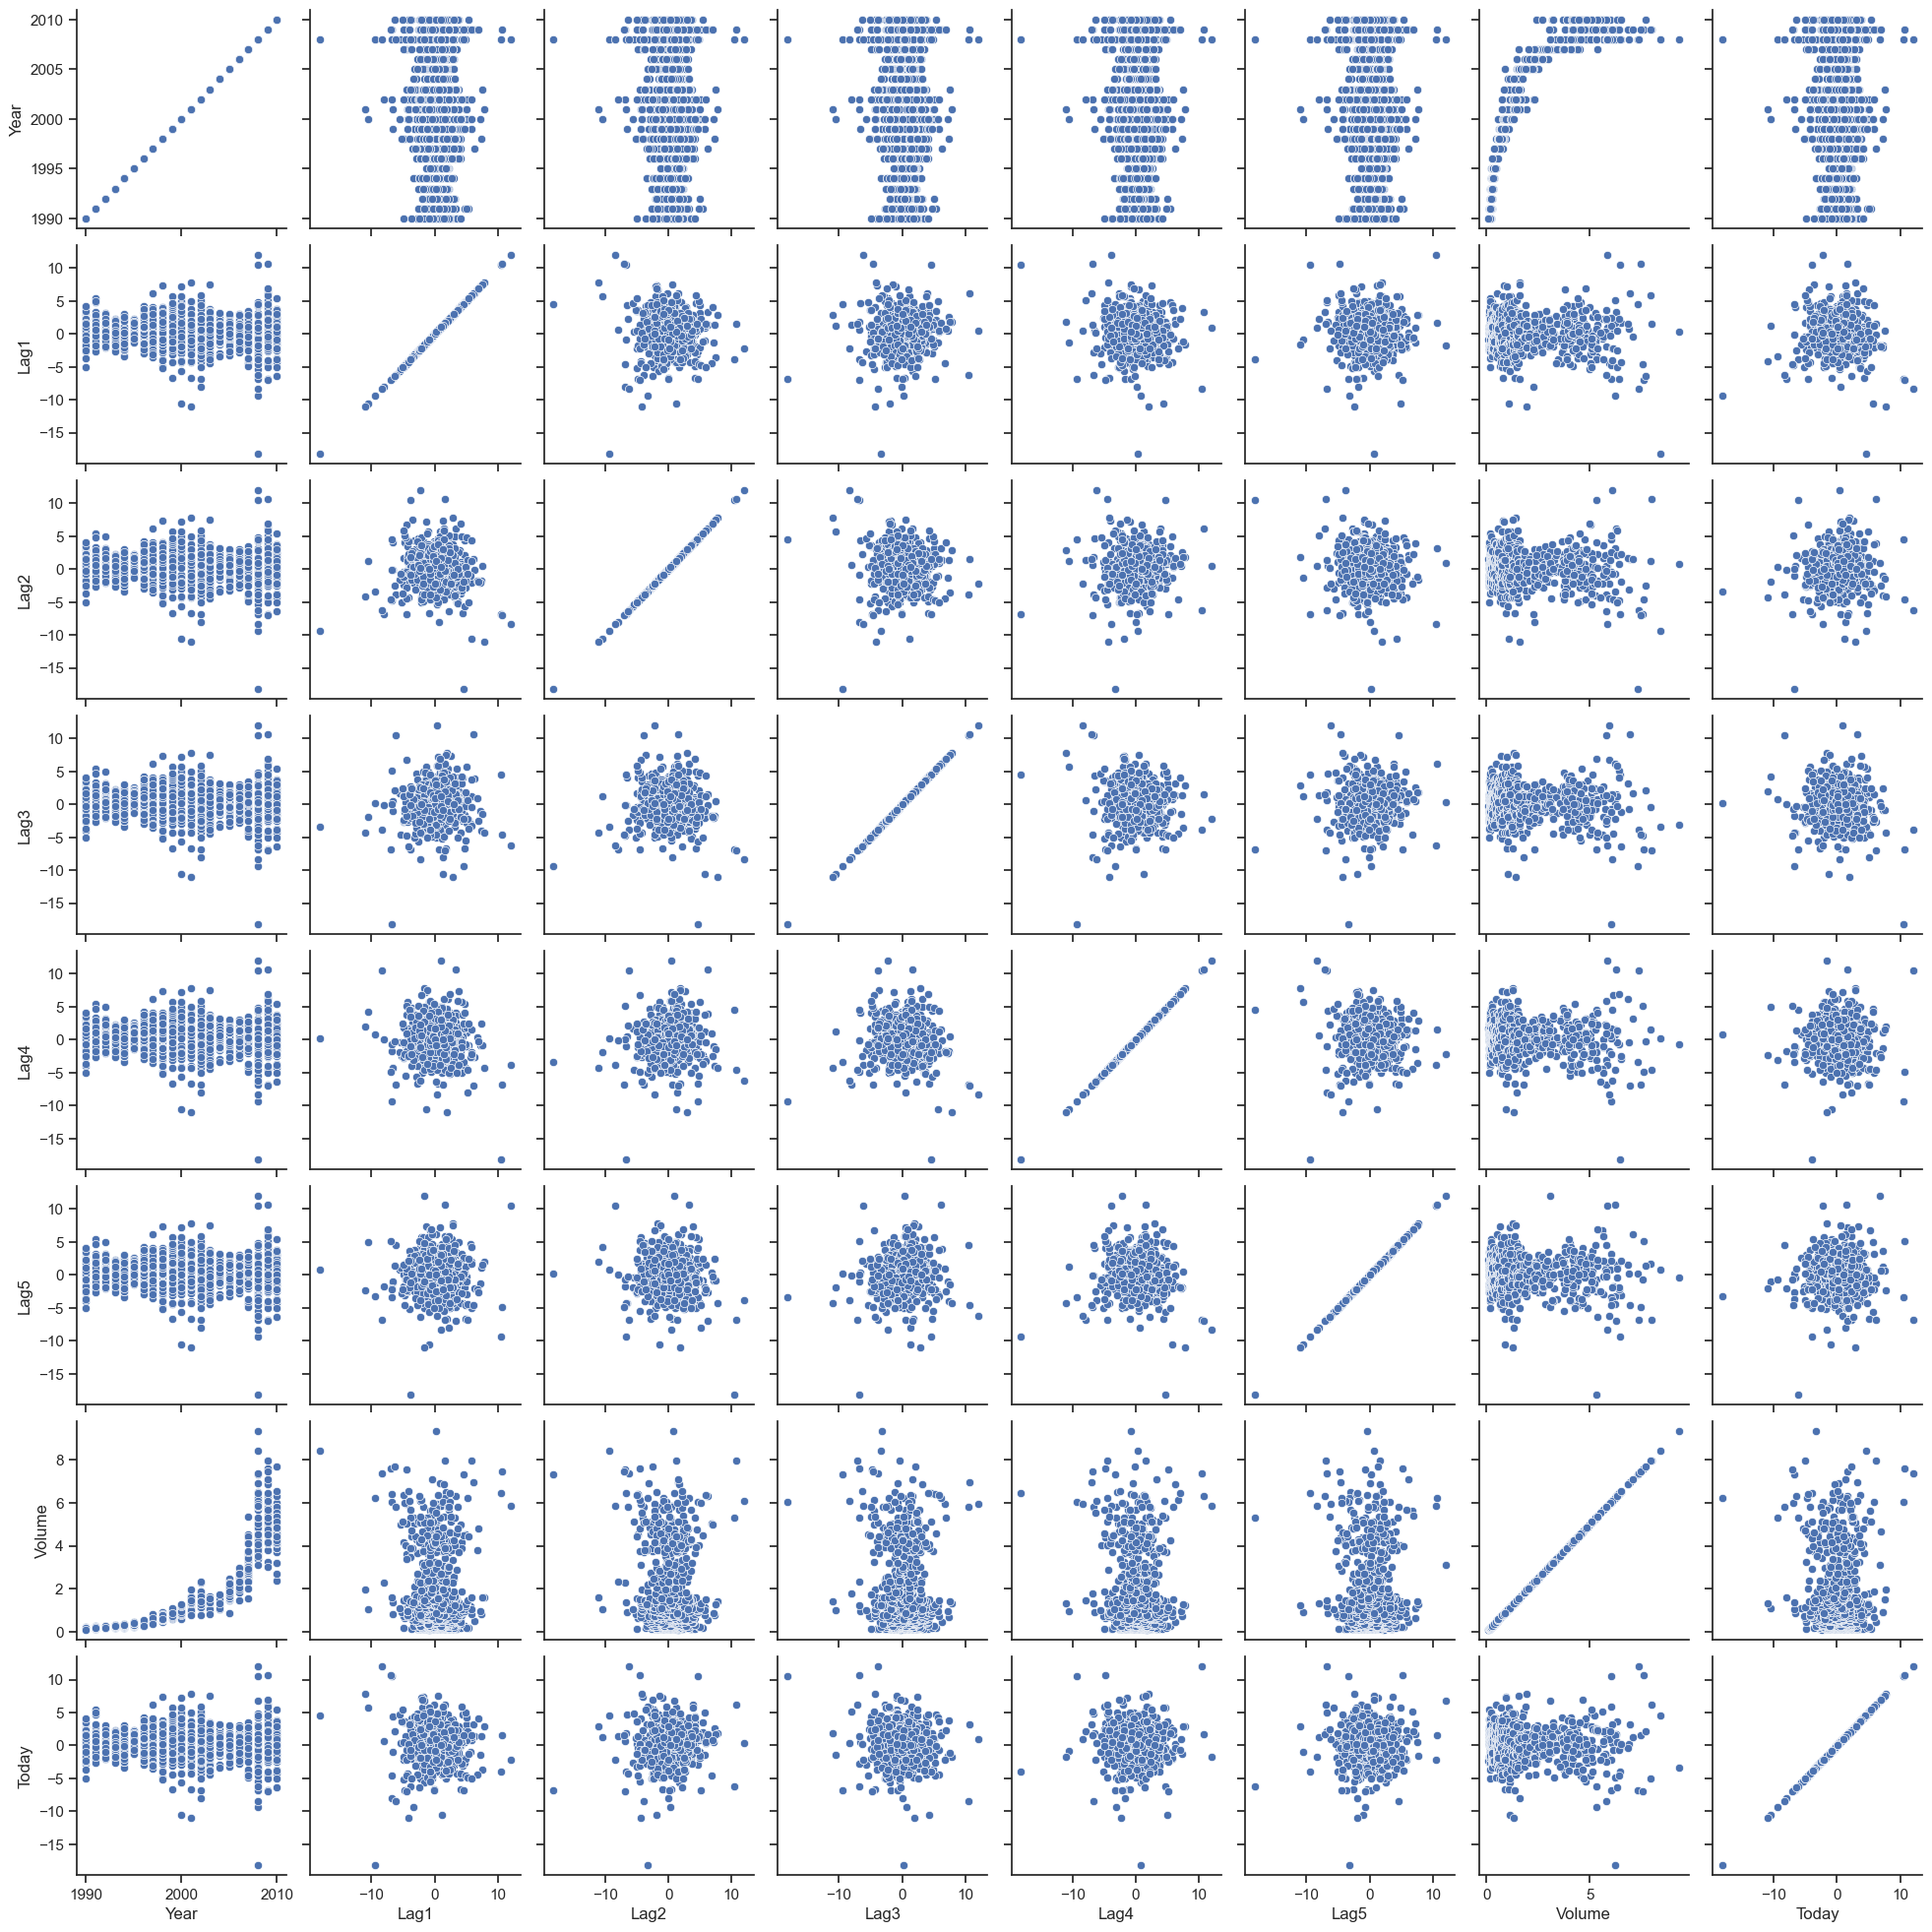

In [117]:
#graphical summary of Weekly data
sns.set(font_scale=1.0)
sns.set_style('ticks')
sns.pairplot(Weekly, diag_kind=None)
plt.show()

<Axes: xlabel='Year', ylabel='Volume'>

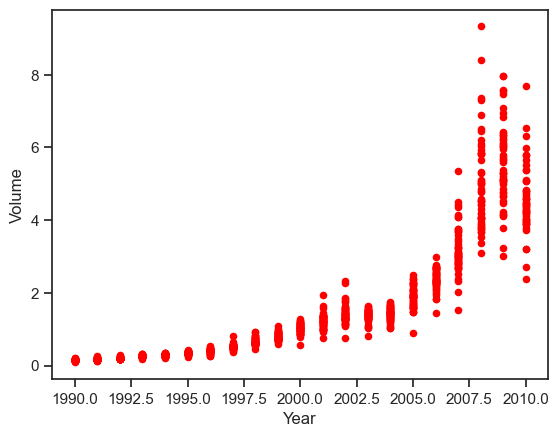

In [118]:
#we can see that there are some correlations between 'Year' and 'Volume'.
Weekly.plot.scatter('Year', 'Volume', color='red')

***
### Q9(b)

In [119]:
#Q(b)
X_q9 = MS(Weekly.columns.drop(['Today', 'Direction', 'Year'])).fit_transform(Weekly) #I want to use only five lag variables plus Volume as predictors
y_q9 = Weekly.Direction == 'Up' #change y into Boolean type
glm = sm.Logit(y_q9, X_q9)
result1 = glm.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                0.006580
Time:                        16:09:42   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Lag2 appears to be statistically significant, because the p-value corresponding to Lag2 is significantly small.

***
### Q9(c)

In [120]:
#Q9(c)
probs=result1.predict() #predicting probablity that Direction == 'Up'
labels=np.array(['Down']*1089) #1089 is the number of observations
labels[probs>0.5]='Up'
confusion_matrix=confusion_table(labels,Weekly.Direction)
print(confusion_matrix)

print("\nOverall fraction of correct prediction : ",np.mean(labels==Weekly.Direction)) #overall fraction of correct predictions

Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

Overall fraction of correct prediction :  0.5610651974288338


If we see the confusion matrix, our model correctly predicted that the Directions were "Up" on 557 weeks and "Down" on 54 weeks, for total 611 correct predictions. The overall fraction of correct prediction can also be calculated by $\frac{611}{1089}=0.561$, while 1089 is the total number of observations.
***
### Q9(d)


In [121]:
#Q9(d)
train=(Weekly.Year<2009) & (Weekly.Year>=1990)  #Boolean value
print(Weekly.loc[train].shape)
print(Weekly.loc[~train].shape) #shape of test set

(985, 9)
(104, 9)


In [122]:
model=MS(['Lag2']).fit(Weekly)
X_q9=model.transform(Weekly)
X_train, X_test = X_q9.loc[train], X_q9.loc[~train]
y_train, y_test = y_q9.loc[train], y_q9.loc[~train]
logit_train=sm.Logit(y_train, X_train) #fit the logistic regression model with training data set.
result2=logit_train.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                0.003076
Time:                        16:09:42   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [123]:
probs=result2.predict(exog=X_test) #exog represents the independent variable to be used in the prediction
real_train, real_test = Weekly.Direction.loc[train], Weekly.Direction.loc[~train] #real Direction in true data frame
labels=np.array(['Down']*104) #104 is the number of test data sets
labels[probs>0.5]='Up'
confusion_matrix=confusion_table(labels, real_test)
print(confusion_matrix)
print("\nOverall fraction of correct prediction in the Logistic regression model : ",np.mean(labels==real_test)) #overall fraction of correct predictions
#"labels==real_test" returns the boolean value, and the array, True is treated as 1 and False is treated as 0. 
#np.mean(labels==real_test) indicates the degree of correspondence between the labels and real_test array, i.e accuracy.

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

Overall fraction of correct prediction in the Logistic regression model :  0.625


In [124]:
y_train #boolean variable

0      False
1      False
2       True
3       True
4       True
       ...  
980    False
981     True
982     True
983    False
984     True
Name: Direction, Length: 985, dtype: bool

In [125]:
real_train #original data, the class labels.

0      Down
1      Down
2        Up
3        Up
4        Up
       ... 
980    Down
981      Up
982      Up
983    Down
984      Up
Name: Direction, Length: 985, dtype: object

***
### Q9(e)
In the LDA model, we don't need 'intercept'.

In [126]:
#Q9(e)

#Dropping the 'intercept' column.
X_train_lda = X_train.drop(columns=['intercept'])
X_test_lda = X_test.drop(columns=['intercept'])

#Creating LDA model and fitting.
lda=LDA(store_covariance=True)
lda.fit(X_train_lda, real_train) #we use real_train instead of y_train because we want "class" labels.

#Predicting the test data
lda_pred=lda.predict(X_test_lda)

In [127]:
confusion_matrix_lda=confusion_table(lda_pred, real_test)
print(confusion_matrix_lda)
print("\nOverall fraction of correct prediction in the LDA model : ",np.mean(lda_pred==real_test)) 

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

Overall fraction of correct prediction in the LDA model :  0.625


***
### Q9(f)
Fitting the QDA model is similar to the method described in Q9(e).

In [128]:
#Q9(f)

#Dropping the 'intercept' column because we don't need 'intercept' in the QDA model.
X_train_qda = X_train.drop(columns=['intercept'])
X_test_qda = X_test.drop(columns=['intercept'])

#Creating QDA model and fitting.
qda=QDA(store_covariance=True)
qda.fit(X_train_qda, real_train) #we use real_train instead of y_train because we want "class" labels.

#Predicting the test data
qda_pred=qda.predict(X_test_qda)

In [129]:
confusion_matrix_qda=confusion_table(qda_pred, real_test)
print(confusion_matrix_qda)
print("\nOverall fraction of correct prediction in the QDA model : ",np.mean(qda_pred==real_test))

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

Overall fraction of correct prediction in the QDA model :  0.5865384615384616


***
### Q9(g)

In [130]:
#Q9(g)

#Dropping the 'intercept' column because we don't need 'intercept' in the KNN model
X_train_knn = X_train.drop(columns=['intercept'])
X_test_knn = X_test.drop(columns=['intercept'])

#Creating KNN model with K=1, and fit the model.
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_knn, real_train)

#Predicting the test data
knn1_pred=knn1.predict(X_test_knn)

In [131]:
confusion_matrix_knn1=confusion_table(knn1_pred, real_test)
print(confusion_matrix_knn1)
print("\nOverall fraction of correct prediction in the KNN model with K=1 : ",np.mean(knn1_pred==real_test))

Truth      Down  Up
Predicted          
Down         21  30
Up           22  31

Overall fraction of correct prediction in the KNN model with K=1 :  0.5


***
### Q9(h)

In [132]:
#Q9(h)

#Dropping the 'intercept' column because we don't need 'intercept' in the naive Bayes model
X_train_nb = X_train.drop(columns=['intercept'])
X_test_nb = X_test.drop(columns=['intercept'])

#Creating naive Bayes model and fitting.
NB=GaussianNB()
NB.fit(X_train_nb, real_train)

#Predicting the test data
nb_pred=NB.predict(X_test_nb)

In [133]:
confusion_matrix_nb=confusion_table(nb_pred, real_test)
print(confusion_matrix_nb)
print("\nOverall fraction of correct prediction in the Naive Bayes model : ",np.mean(nb_pred==real_test))

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

Overall fraction of correct prediction in the Naive Bayes model :  0.5865384615384616


***
### Q9(i)

Through the process from (d) to (h), the logistic regression model and the LDA model showed the best results in this data. Their overall fractions of correct predictions were the same as 0.625. 

In the case of QDA and naive Bayes models, they just predicted all the direction of the test data as "Up", so they couldn't predict any "Down". Therefore, I think it's not very good to use both models in this problem regardless of their fractions of correct predictions.
***
***